# Overview over COVID-19 Data

This notebook is used to get an overview over COVID-19 data sets from the RKI (Robert Koch Institut in Germany).
It should help to get a first insight into the data.

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

In [59]:
df = pd.read_csv("data/testnumbers_combined.csv", delimiter=',')

In [60]:
df.tail()

,Kalenderwoche,Anzahl Testungen,Positiv getestet,Positivenanteil (%),Anzahl übermittelnder Labore
52,9/2021,1151639,71647,6.22,210.0
53,10/2021,1278442,85587,6.69,214.0
54,11/2021,1364375,107658,7.89,206.0
55,12/2021,1401576,130826,9.33,200.0
56,Summe,50399177,3087687,NaN,NaN


In [62]:
df['Positiv getestet'] = pd.to_numeric(df['Positiv getestet'], errors='coerce')
df['Anzahl Testungen'] = pd.to_numeric(df['Anzahl Testungen'], errors='coerce')

In [68]:
y_number_positives = df['Positiv getestet'].iloc[:-1] # Leave last value out because it is the sum of all
y_number_tests = df['Anzahl Testungen'].iloc[:-1] # Leave last value out because it is the sum of all

Text(0.5, 1.0, 'Number of Corona tests vs. positively tested people')

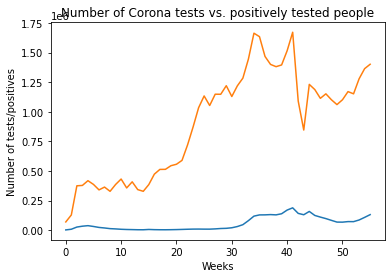

In [74]:
plt.plot(y_number_positives)
plt.plot(y_number_tests)
plt.xlabel('Weeks')
plt.ylabel('Number of tests/positives')
plt.title('Number of Corona tests vs. positively tested people')